In [1]:
# import qutip
from qutip import *

# import qutip for pulse processor
from qutip.qip.device import OptPulseProcessor
from qutip.qip.circuit import QubitCircuit
from qutip.qip.operations import expand_operator, toffoli
from qutip.operators import sigmaz, sigmax, identity
from qutip.states import basis
from qutip.metrics import fidelity
from qutip.tensor import tensor

# import plotting packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# import math packages
import numpy as np
from math import pi

In [258]:
N = 20                    # number of cavity fock states

wr = 5.0622 * 2 * pi      # resonator frequency
wq = 4.7206 * 2 * pi      # qubit frequency
chi = 0.0052 * 2 * pi     # parameter in the dispersive hamiltonian

delta = abs(wr - wq)      # detuning
g = np.sqrt(delta * chi)  # coupling strength that is consistent with chi

"""kappa = 0.0  # cavity dissipation rate
t1 = 0.0800           # qubit relaxation rate
t2 = 0.0080           # qubit dephasing rate

n_th_a = 0.063  # avg number of thermal bath excitation
use_rwa = True"""

In [259]:
# compare detuning and g, the first should be much larger than the second
delta/(2*pi), g/(2*pi)

(0.34159999999999957, 0.042146411472389886)

In [260]:
# cavity operators
a = tensor(destroy(N), qeye(2))
nc = a.dag() * a
xc = a + a.dag()

# atomic operators
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())
sx = tensor(qeye(N), sigmax())
nq = sm.dag() * sm
xq = sm + sm.dag()

I = tensor(qeye(N), qeye(2))

In [263]:
# dispersive hamiltonian
H = wr * (a.dag() * a + I/2.0) + (wq / 2.0) * sz + chi * (a.dag() * a + I/2) * sz

"""# decoupled Hamiltonian
H0 = wr * a.dag() * a + wq * sm.dag() * sm

# interaction Hamiltonian
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

# coupling Hamlitonian
H_coup = H0 + g * H1"""

In [264]:
psi0 = tensor(coherent(N, np.sqrt(4)), (basis(2,0)+basis(2,1)).unit())

In [265]:
tlist = np.linspace(0, 250, 1000)

In [266]:
"""c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)
    
# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())
    
# qubit relaxation
rate = gamma
c_ops.append(np.sqrt(t1 * (1+n_th_a)) * sm)
c_ops.append(np.sqrt(t1 * n_th_a) * sm.dag())
c_ops.append(np.sqrt(t2) * sz)"""

In [267]:
res = mesolve(H, psi0, tlist, [], [], options=Odeoptions(nsteps=5000))
"""output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])
output1 = mesolve(H_coup, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])"""

Text(0.5, 1.0, 'Vacuum Rabi Oscillations')

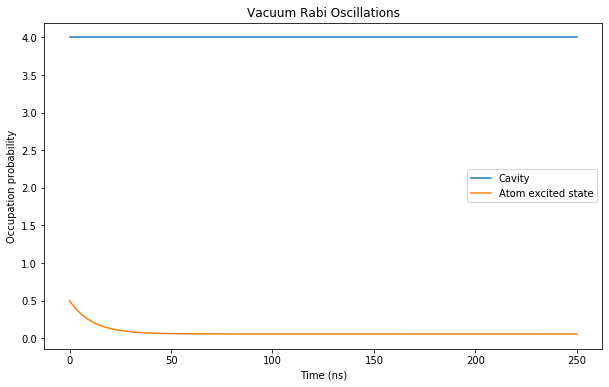

In [270]:
"""n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1,1,figsize=(10,6))

axes.plot(tlist,n_c,label="Cavity")
axes.plot(tlist,n_a,label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time (ns)")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi Oscillations")"""

In [271]:
nc_list = expect(nc, res.states)
nq_list = expect(nq, res.states)

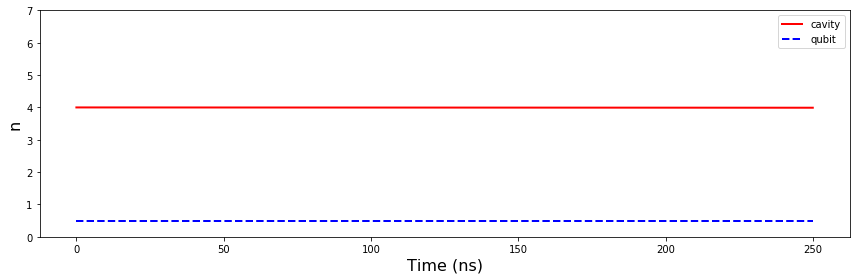

In [272]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax.plot(tlist, nc_list, 'r', linewidth=2, label="cavity")
ax.plot(tlist, nq_list, 'b--', linewidth=2, label="qubit")
ax.set_ylim(0, 7)
ax.set_ylabel("n", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()

fig.tight_layout()

In [273]:
xc_list = expect(xc, res.states)

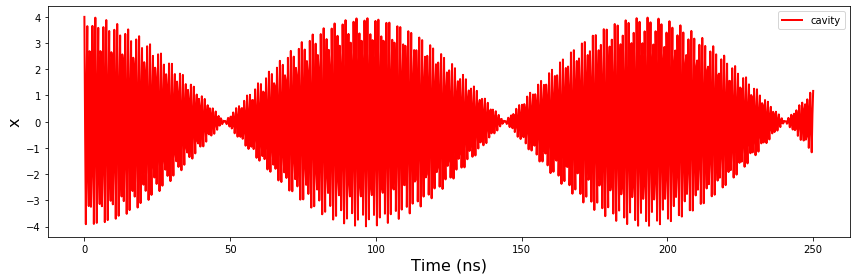

In [274]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax.plot(tlist, xc_list, 'r', linewidth=2, label="cavity")
ax.set_ylabel("x", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()

fig.tight_layout()

In [275]:
tlist = np.linspace(0, 1000, 10000)

In [276]:
corr_vec = correlation_2op_2t(H, psi0, None, tlist, [], a.dag(), a)

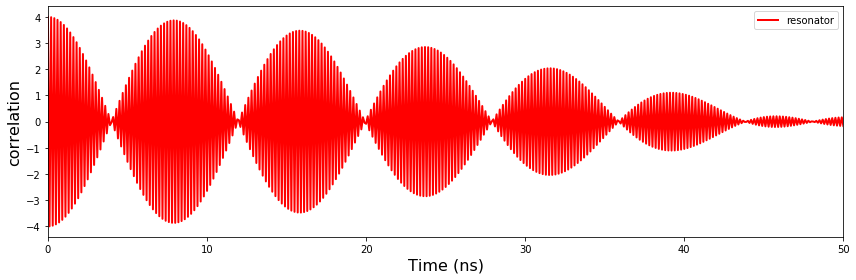

In [277]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax.plot(tlist, np.real(corr_vec), 'r', linewidth=2, label="resonator")
ax.set_ylabel("correlation", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()
ax.set_xlim(0,50)
fig.tight_layout()

In [278]:
w, S = spectrum_correlation_fft(tlist, corr_vec)

Text(0.5, 0, '$\\omega$')

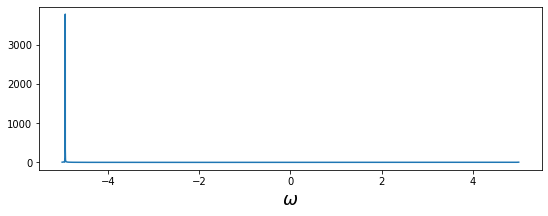

In [279]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w / (2 * pi), abs(S))
ax.set_xlabel(r'$\omega$', fontsize=18)
# ax.set_xlim(wr/(2*pi)-.5, wr/(2*pi)+.5);

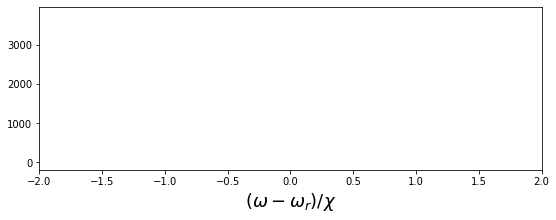

In [280]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot((w-wr)/chi, abs(S))
ax.set_xlabel(r'$(\omega-\omega_r)/\chi$', fontsize=18)
ax.set_xlim(-2,2);

In [281]:
corr_vec = correlation_2op_2t(H, psi0, None, tlist, [], sx, sx)

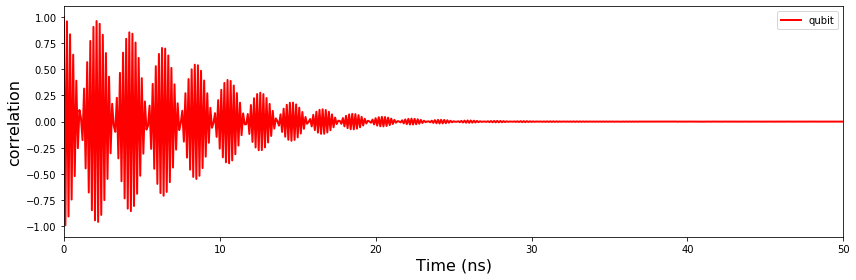

In [106]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,4))

ax.plot(tlist, np.real(corr_vec), 'r', linewidth=2, label="qubit")
ax.set_ylabel("correlation", fontsize=16)
ax.set_xlabel("Time (ns)", fontsize=16)
ax.legend()
ax.set_xlim(0,50)
fig.tight_layout()

In [107]:
w, S = spectrum_correlation_fft(tlist, corr_vec)

Text(0.5, 0, '$\\omega$')

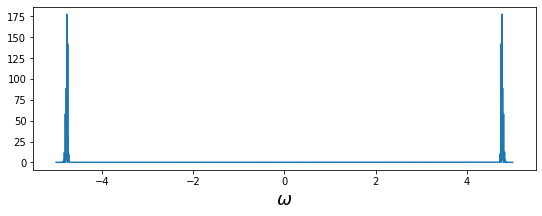

In [108]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w / (2 * pi), abs(S))
ax.set_xlabel(r'$\omega$', fontsize=18)

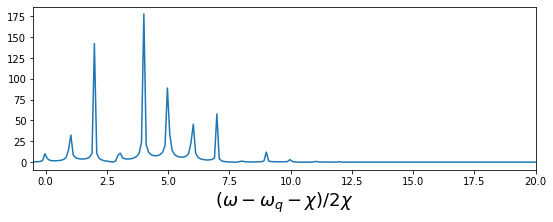

In [109]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot((w - wq - chi) / (2 * chi), abs(S))
ax.set_xlabel(r'$(\omega - \omega_q - \chi)/2\chi$', fontsize=18)
ax.set_xlim(-.5, N);

In [110]:
rho_cavity = ptrace(res.states[-1], 0)

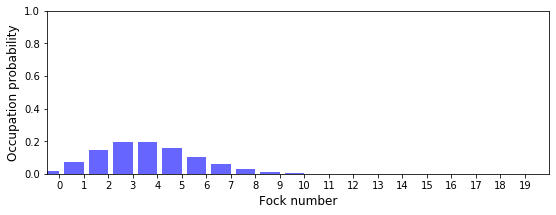

In [111]:
fig, axes = plt.subplots(1, 1, figsize=(9,3))

axes.bar(np.arange(0, N)-.4, np.real(rho_cavity.diag()), color="blue", alpha=0.6)
axes.set_ylim(0, 1)
axes.set_xlim(-0.5, N)
axes.set_xticks(np.arange(0, N))
axes.set_xlabel('Fock number', fontsize=12)
axes.set_ylabel('Occupation probability', fontsize=12);

NameError: name 'rho_cavity' is not defined

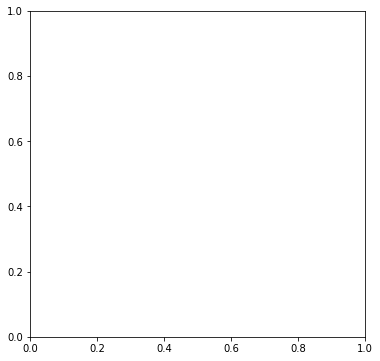

In [103]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))

xvec = np.linspace(-5,5,200)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()

axes.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes.set_xlabel(r'Im $\alpha$', fontsize=18)
axes.set_ylabel(r'Re $\alpha$', fontsize=18);

In [302]:
N = 1

# drift Hamiltonian
H_d = sigmaz()

# control Hamiltonian
H_c = sigmax()

processor = OptPulseProcessor(N, drift=H_d)
processor.add_control(H_c, 0)

trials = 11  # add 1

********** Gate 0 **********
Final fidelity error 2.078781591308143e-12
Final gradient normal 7.5136567283119e-06
Terminated due to Goal achieved
Number of iterations 11
********** Gate 0 **********
Final fidelity error 4.411582210650522e-12
Final gradient normal 5.8846377992873884e-05
Terminated due to Goal achieved
Number of iterations 9
********** Gate 0 **********
Final fidelity error 7.522871214860061e-13
Final gradient normal 2.4896093209364374e-05
Terminated due to Goal achieved
Number of iterations 11
********** Gate 0 **********
Final fidelity error 7.582179328835537e-11
Final gradient normal 3.681652842367185e-05
Terminated due to Goal achieved
Number of iterations 11
********** Gate 0 **********
Final fidelity error 7.561395953814554e-12
Final gradient normal 1.0587629979600527e-05
Terminated due to Goal achieved
Number of iterations 11
********** Gate 0 **********
Final fidelity error 3.263833647793035e-12
Final gradient normal 2.4349280214549935e-05
Terminated due to Goal 

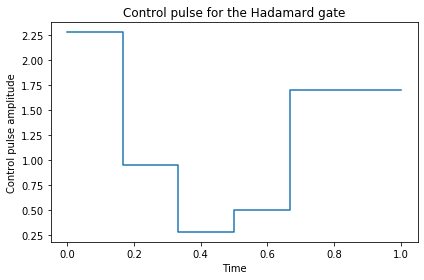

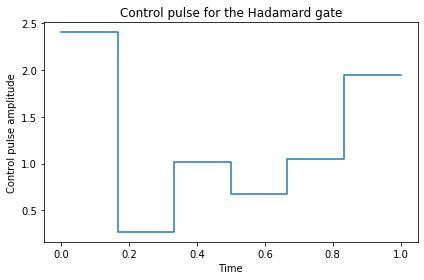

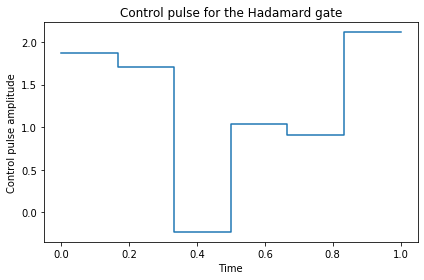

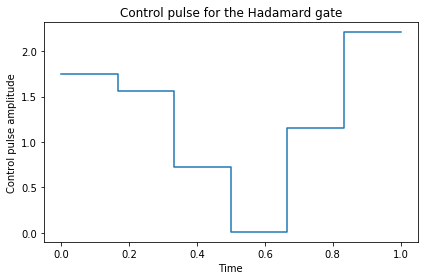

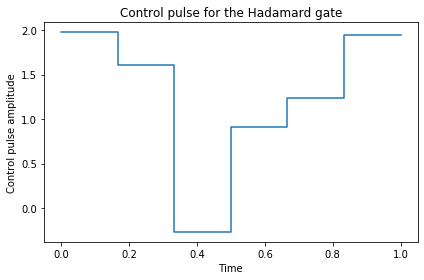

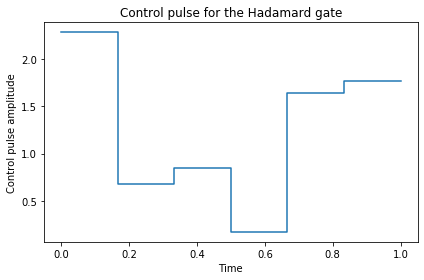

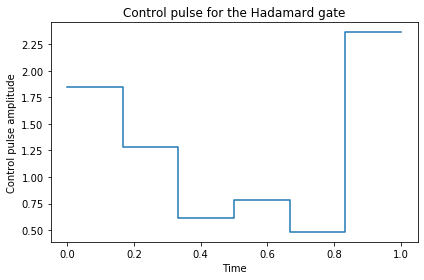

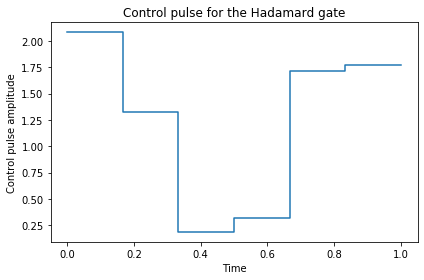

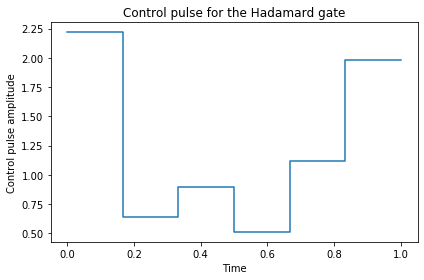

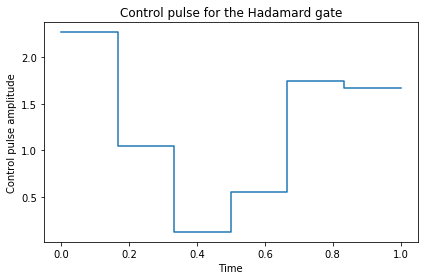

In [309]:
coeffs_arr = []
tlist_arr = []

for i in range(1,trials):
    qc = QubitCircuit(N)
    qc.add_gate("SNOT", 0)

    # This method calls optimize_pulse_unitary
    tlist, coeffs = processor.load_circuit(qc, min_grad=1e-20, init_pulse_type='RND',
                                           num_tslots=6, evo_time=1, verbose=True)
    processor.plot_pulses(title="Control pulse for the Hadamard gate");
    
    coeffs_arr.append(coeffs)
    tlist_arr.append(tlist)
    

# tlist_arr.remove(0.0)

In [316]:
coeffs_list = []
for sublist in coeffs_arr:
    for item in sublist:
        coeffs_list.append(item)
        
flat_coeffs_list = []
for sublist in coeffs_list:
    for item in sublist:
        flat_coeffs_list.append(item)
        
# print(flat_coeffs_list)
        
# print(area_list)

tlist_list = []
for sublist in tlist_arr:
    for item in sublist:
        tlist_list.append(item)
        
for i in range(1,trials):
    tlist_list.remove(0)

area_list = []
for i in range(0,trials*6-6):
    # x = tlist_list[i]
    # x = tlist_list[i]-tlist_list[i-1]
    x = 0.1666666716337204
    y = flat_coeffs_list[i]
    # print(x)
    # print(y)
    area = x * y
    area_list.append(area)

Text(0.5, 0, 'Pulse length [ns]')

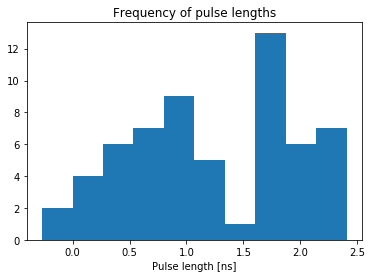

In [317]:
plt.hist(flat_coeffs_list)
plt.title("Frequency of pulse lengths")
plt.xlabel("Pulse length [ns]")

Text(0.5, 1.0, '2D Rabi oscillation')

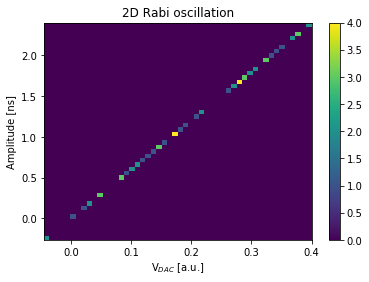

In [318]:
x = np.array(area_list)
y = np.array(flat_coeffs_list)

plt.hist2d(x,y,bins=(50,50))
# plt.xlim(-0.5,1)
# plt.ylim(-2.5,10)
plt.colorbar()
plt.xlabel("V$_{DAC}$ [a.u.]")
plt.ylabel("Amplitude [ns]")
plt.title("2D Rabi oscillation")